In [1]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=c1d76ce0748d737009211a746e8db109fe3f2565271c3d7f20ee9e33b300ffa2
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/77/8a/04/7b1a8ce5de6555a18e09370d3d4fde48be9571ac07a623071e
Successfully built bs4


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
#Question 1 - Extracting Tesla Stock Data Using yfinance 

In [4]:
Tesla = yf.Ticker('TSLA')

In [5]:
tesla_data = Tesla.history(period = "max")

In [6]:
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [7]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data

In [8]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [29]:
beautiful_soup=BeautifulSoup(html_data,"html5lib")

In [9]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>]

In [11]:
tables=beautiful_soup.find_all("table")
for index,table in enumerate(tables):
    if("Tesla Quarterly Revenue" in str(table)):
        table_index=index
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all('tr'):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.strip().replace("$","").replace(",","")
        tesla_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
tesla_revenue.head()

,Date,Revenue
0,2022-12-31,24318
1,2022-09-30,21454
2,2022-06-30,16934
3,2022-03-31,18756
4,2021-12-31,17719


In [12]:
print(tesla_revenue)

tesla_revenue.dropna(inplace=True)
not_empty=tesla_revenue["Revenue"]!=""
tesla_revenue=tesla_revenue[not_empty]

          Date Revenue
0   2022-12-31   24318
1   2022-09-30   21454
2   2022-06-30   16934
3   2022-03-31   18756
4   2021-12-31   17719
5   2021-09-30   13757
6   2021-06-30   11958
7   2021-03-31   10389
8   2020-12-31   10744
9   2020-09-30    8771
10  2020-06-30    6036
11  2020-03-31    5985
12  2019-12-31    7384
13  2019-09-30    6303
14  2019-06-30    6350
15  2019-03-31    4541
16  2018-12-31    7226
17  2018-09-30    6824
18  2018-06-30    4002
19  2018-03-31    3409
20  2017-12-31    3288
21  2017-09-30    2985
22  2017-06-30    2790
23  2017-03-31    2696
24  2016-12-31    2285
25  2016-09-30    2298
26  2016-06-30    1270
27  2016-03-31    1147
28  2015-12-31    1214
29  2015-09-30     937
30  2015-06-30     955
31  2015-03-31     940
32  2014-12-31     957
33  2014-09-30     852
34  2014-06-30     769
35  2014-03-31     621
36  2013-12-31     615
37  2013-09-30     431
38  2013-06-30     405
39  2013-03-31     562
40  2012-12-31     306
41  2012-09-30      50
42  2012-06

In [ ]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data

In [13]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
tesla_revenue.tail()

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


In [ ]:
#Question 3: Use yfinance to Extract Stock Data

In [19]:
GameStop = yf.Ticker("GME")

In [16]:
gme_data = GameStop.history(period = 'max')

In [43]:
gme_data.reset_index(inplace = True)
gme_data.head()

,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,4,4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [44]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue."
html_data=requests.get(url).text

In [45]:
beautiful_soup=BeautifulSoup(html_data,"html.parser")

In [46]:
tables=beautiful_soup.find_all("table")
for index,table in enumerate(tables):
    if(str(table)=="GameStop Quarterly Revenue"):
        table_index=index

gme_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.replace("$","").replace(",","")
        gme_revenue=gme_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
gme_revenue.head()

,Date,Revenue
0,2022-10-31,1186
1,2022-07-31,1136
2,2022-04-30,1378
3,2022-01-31,2254
4,2021-10-31,1297


In [47]:
gme_revenue.tail()

,Date,Revenue
51,2010-01-31,3524
52,2009-10-31,1835
53,2009-07-31,1739
54,2009-04-30,1981
55,2009-01-31,3492


In [ ]:
#Question 5: Plot Tesla Stock Graph

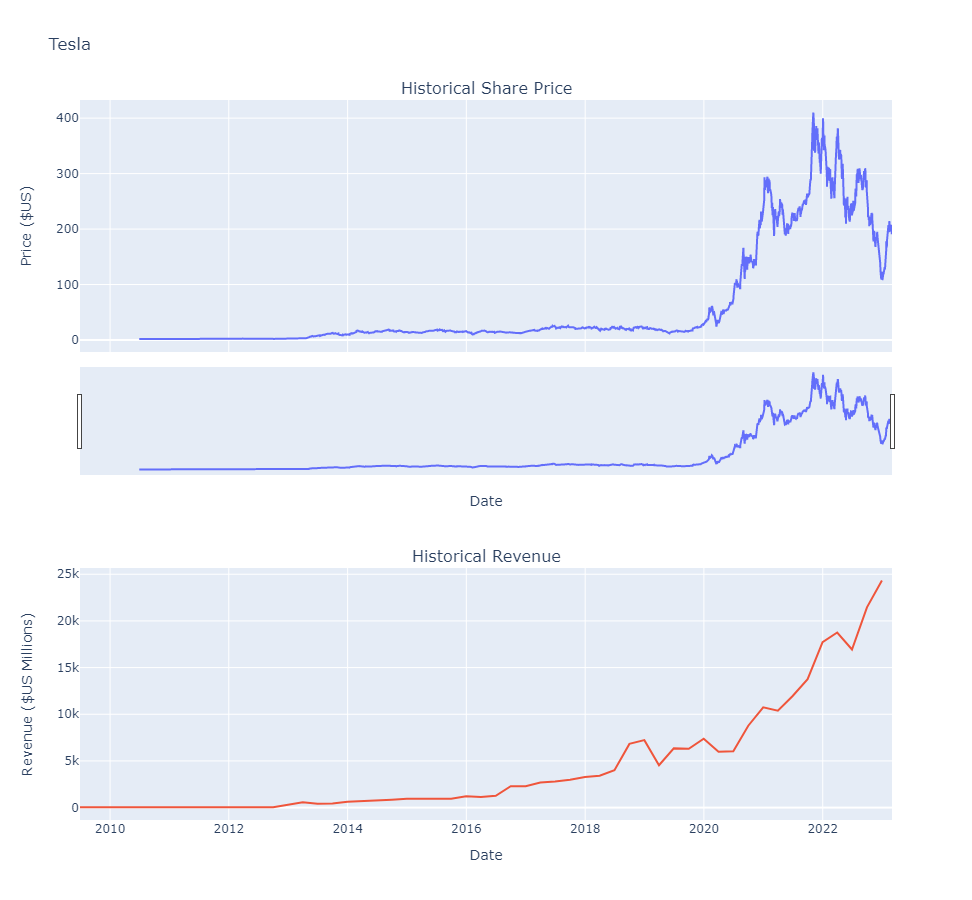

In [51]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [ ]:
#Question 6: Plot GameStop Stock Graph

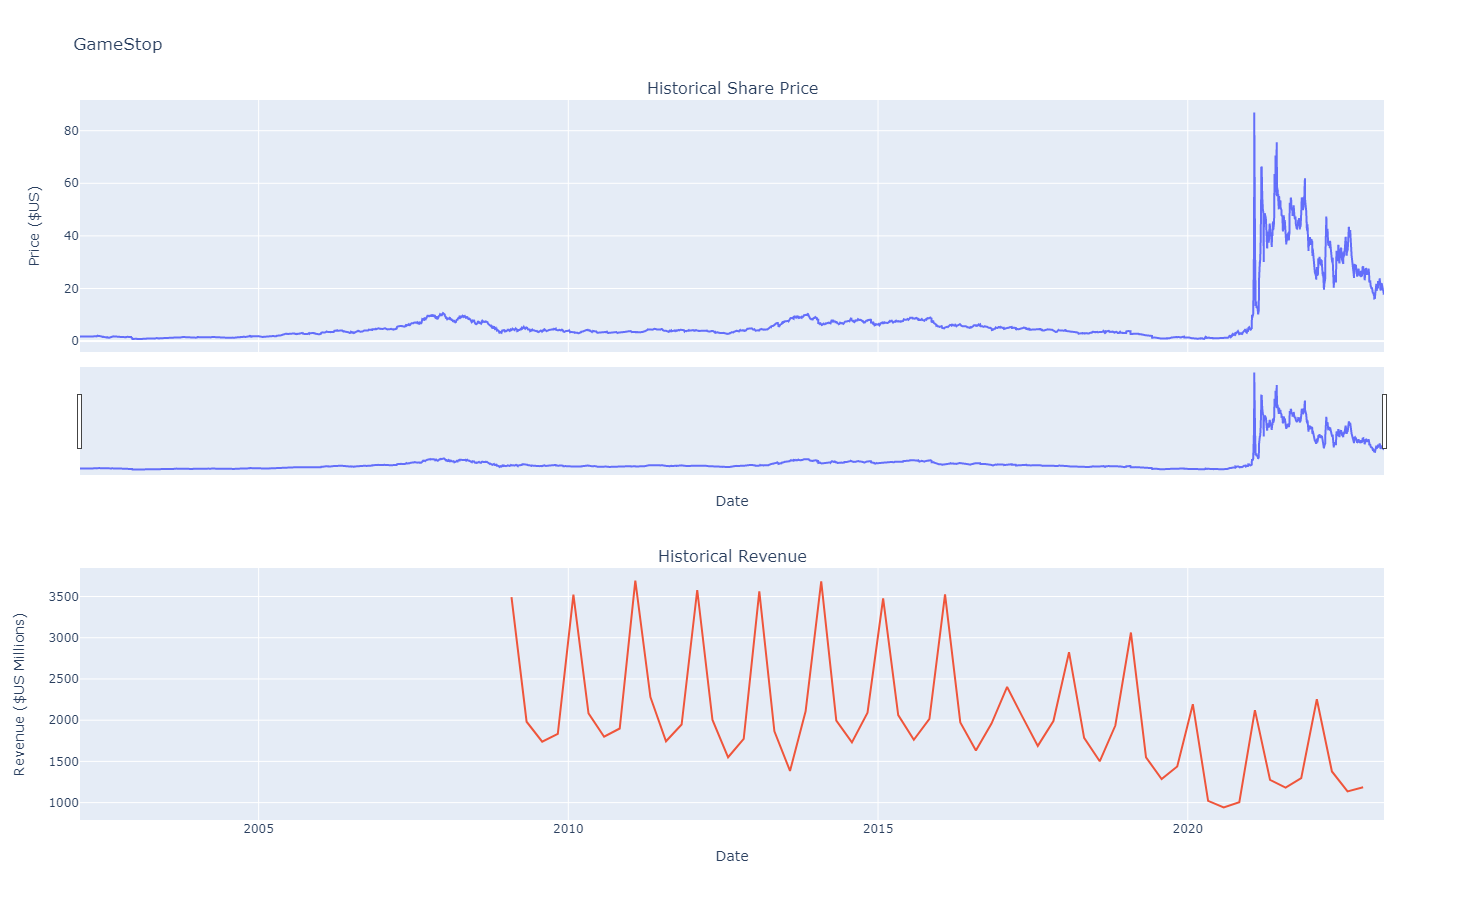

In [52]:
make_graph(gme_data,gme_revenue,'GameStop')